In [107]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

from imblearn.over_sampling import SMOTE 
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [108]:
data_mobile = pd.read_excel("Mobile_SM_Tourism.xlsx")

data_mobile.head().T

,0,1,2,3,4
UserID,1000001,1000002,1000003,1000004,1000005
Taken_product,Yes,No,Yes,No,No
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,iOS and Android,iOS,iOS and Android,iOS,iOS and Android
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1,1,1,1,1
member_in_family,2,1,2,4,1
preferred_location_type,Financial,Financial,Other,Financial,Medical
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993,5130,2090,2909,3468


In [109]:
data_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        10652 non-null  int64  
 1   Taken_product                                 10652 non-null  object 
 2   Yearly_avg_view_on_travel_page                10071 non-null  float64
 3   preferred_device                              10599 non-null  object 
 4   total_likes_on_outstation_checkin_given       10271 non-null  float64
 5   yearly_avg_Outstation_checkins                10577 non-null  object 
 6   member_in_family                              10652 non-null  object 
 7   preferred_location_type                       10621 non-null  object 
 8   Yearly_avg_comment_on_travel_page             10446 non-null  float64
 9   total_likes_on_outofstation_checkin_received  10652 non-null 

In [110]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,10652.0,1.005575e+06,3381.953331,1000001.0,1002663.75,1005326.5,1008484.25,1011760.0
Yearly_avg_view_on_travel_page,10071.0,2.806878e+02,68.604222,35.0,231.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,10271.0,2.821372e+04,14491.041876,3570.0,16285.00,28210.0,40670.00,252430.0
Yearly_avg_comment_on_travel_page,10446.0,7.450297e+01,24.305226,3.0,57.00,74.0,92.00,815.0
total_likes_on_outofstation_checkin_received,10652.0,6.563464e+03,4739.701522,1009.0,2945.75,4967.5,8394.25,20065.0
week_since_last_outstation_checkin,10652.0,3.224934e+00,2.628021,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,10652.0,2.889692e+01,51.084242,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,10652.0,2.705595e+00,1.080931,1.0,2.00,3.0,4.00,4.0
Adult_flag,10652.0,7.968457e-01,0.854243,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,10652.0,1.383740e+01,9.159876,0.0,8.00,12.0,18.00,270.0


In [111]:
data_mobile.shape

(10652, 17)

In [112]:
data_mobile.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [113]:
dups = data_mobile.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [114]:
df_mobile = data_mobile.drop('UserID',axis=1)

In [115]:
df_mobile.head().T

,0,1,2,3,4
Taken_product,Yes,No,Yes,No,No
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,iOS and Android,iOS,iOS and Android,iOS,iOS and Android
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1,1,1,1,1
member_in_family,2,1,2,4,1
preferred_location_type,Financial,Financial,Other,Financial,Medical
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993,5130,2090,2909,3468
week_since_last_outstation_checkin,8,1,6,1,9


In [116]:
df_mobile.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,10071.0,280.687817,68.604222,35.0,231.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,10271.0,28213.720572,14491.041876,3570.0,16285.00,28210.0,40670.00,252430.0
Yearly_avg_comment_on_travel_page,10446.0,74.502968,24.305226,3.0,57.00,74.0,92.00,815.0
total_likes_on_outofstation_checkin_received,10652.0,6563.464232,4739.701522,1009.0,2945.75,4967.5,8394.25,20065.0
week_since_last_outstation_checkin,10652.0,3.224934,2.628021,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,10652.0,28.896921,51.084242,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,10652.0,2.705595,1.080931,1.0,2.00,3.0,4.00,4.0
Adult_flag,10652.0,0.796846,0.854243,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,10652.0,13.837401,9.159876,0.0,8.00,12.0,18.00,270.0


In [117]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  object 
 1   Yearly_avg_view_on_travel_page                10071 non-null  float64
 2   preferred_device                              10599 non-null  object 
 3   total_likes_on_outstation_checkin_given       10271 non-null  float64
 4   yearly_avg_Outstation_checkins                10577 non-null  object 
 5   member_in_family                              10652 non-null  object 
 6   preferred_location_type                       10621 non-null  object 
 7   Yearly_avg_comment_on_travel_page             10446 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10652 non-null  int64  
 9   week_since_last_outstation_checkin            10652 non-null 

In [118]:
df_mobile.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

Displaying unique values

In [119]:
for i in df_mobile.columns:
    if df_mobile[i].dtype == 'object':
        print(i)
        print(df_mobile[i].unique())
        print("\n")

Taken_product
['Yes' 'No']


preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Mobile']


yearly_avg_Outstation_checkins
[1 24 23 27 16 15 26 19 21 11 10 25 12 18 29 nan 22 14 20 28 17 13 '*' 5 2
 3 9 7 6 8 4]


member_in_family
[2 1 4 'Three' 3 5 10]


preferred_location_type
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']


following_company_page
['Yes' 'No' nan 1 0]


working_flag
['No' 'Yes']




Cleaning the dataset

In [120]:
#There seems to be certain garbage values in the dataset. Lets set that right by replacing them with null values

df_mobile['yearly_avg_Outstation_checkins'] = df_mobile['yearly_avg_Outstation_checkins'].replace('*',np.nan)

In [121]:
#As the garbage value is nothing but the value 3 is written in the text format

df_mobile['member_in_family'] = df_mobile['member_in_family'].replace('Three',3)

In [122]:
#Changing 'Yes' into 1 and 'No' to 0

df_mobile['following_company_page'] = df_mobile['following_company_page'].replace('Yes','1')
df_mobile['following_company_page'] = df_mobile['following_company_page'].replace('No','0')

In [123]:
df_mobile['Taken_product'] = df_mobile['Taken_product'].replace('Yes','1')
df_mobile['Taken_product'] = df_mobile['Taken_product'].replace('No','0')

df_mobile['working_flag'] = df_mobile['working_flag'].replace('Yes','1')
df_mobile['working_flag'] = df_mobile['working_flag'].replace('No','0')

df_mobile['following_company_page'] = df_mobile['following_company_page'].replace(1,'1')
df_mobile['following_company_page'] = df_mobile['following_company_page'].replace(0,'0')

In [124]:
df_mobile['preferred_location_type'] = df_mobile['preferred_location_type'].replace('Tour  Travel','Tour and Travel')
df_mobile['preferred_location_type'] = df_mobile['preferred_location_type'].replace('Game','Entertainment')
df_mobile['preferred_location_type'] = df_mobile['preferred_location_type'].replace('Movie','Entertainment')

In [125]:
for i in df_mobile.columns:
    if df_mobile[i].dtype == 'object':
        print(i)
        print(df_mobile[i].unique()) 
        print()  

Taken_product
['1' '0']

preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Mobile']

preferred_location_type
['Financial' 'Other' 'Medical' nan 'Entertainment' 'Social media'
 'Tour and Travel' 'OTT' 'Beach' 'Historical site' 'Big Cities' 'Trekking'
 'Hill Stations']

following_company_page
['1' '0' nan]

working_flag
['0' '1']



In [126]:
df_mobile['Adult_flag'] = df_mobile['Adult_flag'].replace(1,0)
df_mobile['Adult_flag'] = df_mobile['Adult_flag'].replace(2,1)
df_mobile['Adult_flag'] = df_mobile['Adult_flag'].replace(3,1)

In [127]:
df_mobile['Adult_flag'].unique()

array([0, 1], dtype=int64)

In [128]:
df_mobile.columns

Index(['Taken_product', 'Yearly_avg_view_on_travel_page', 'preferred_device',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

Replacing the null values

In [129]:
df_mobile['preferred_location_type'] = df_mobile['preferred_location_type'].replace(np.nan,df_mobile['preferred_location_type'].mode()[0])

In [130]:
df_mobile['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', 'Entertainment', 'Social media',
       'Tour and Travel', 'OTT', 'Beach', 'Historical site', 'Big Cities',
       'Trekking', 'Hill Stations'], dtype=object)

In [131]:
df_mobile['yearly_avg_Outstation_checkins'] = df_mobile['yearly_avg_Outstation_checkins'].replace(np.nan,df_mobile['yearly_avg_Outstation_checkins'].mode()[0])

In [132]:
df_mobile['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., 22., 14., 20., 28., 17., 13.,  5.,  2.,  3.,  9.,  7.,
        6.,  8.,  4.])

In [133]:
df_mobile['following_company_page'] = df_mobile['following_company_page'].replace(np.nan,df_mobile['following_company_page'].mode()[0])

In [134]:
df_mobile['following_company_page'].unique()

array(['1', '0'], dtype=object)

In [135]:
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace(np.nan,df_mobile['preferred_device'].mode()[0])

In [136]:
df_mobile['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', 'Tab', 'Android',
       'Android OS', 'Other', 'Others', 'Mobile'], dtype=object)

In [137]:
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace('iOS',0)
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace('iOS and Android',0)
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace('ANDROID',0)
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace('Tab',0)
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace('Android',0)
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace('Android OS',0)
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace('Other',0)
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace('Others',0)
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace('Mobile',0)

In [138]:
df_mobile['preferred_device'].unique()

array([0], dtype=int64)

In [139]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  object 
 1   Yearly_avg_view_on_travel_page                10071 non-null  float64
 2   preferred_device                              10652 non-null  int64  
 3   total_likes_on_outstation_checkin_given       10271 non-null  float64
 4   yearly_avg_Outstation_checkins                10652 non-null  float64
 5   member_in_family                              10652 non-null  int64  
 6   preferred_location_type                       10652 non-null  object 
 7   Yearly_avg_comment_on_travel_page             10446 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10652 non-null  int64  
 9   week_since_last_outstation_checkin            10652 non-null 

In [140]:
#Changing certain columns into int

df_mobile['preferred_device'] = df_mobile['preferred_device'].astype('int64')
df_mobile['preferred_device'].dtype

dtype('int64')

In [141]:
#Changing certain columns into int

df_mobile['working_flag'] = df_mobile['working_flag'].astype('int64')

In [142]:
#Changing certain columns into int

df_mobile['Taken_product'] = df_mobile['Taken_product'].astype('int64')

In [143]:
#Changing certain columns into int

df_mobile['member_in_family'] = df_mobile['member_in_family'].astype('int64')

In [144]:
#Changing certain columns into int

df_mobile['following_company_page'] = df_mobile['following_company_page'].astype('int64')

In [145]:
#Changing certain columns into int

df_mobile['travelling_network_rating'] = df_mobile['travelling_network_rating'].astype('int64')

In [146]:
#Changing certain columns into int

df_mobile['Adult_flag'] = df_mobile['Adult_flag'].astype('int64')

In [147]:
print('Feature: Preferred location type')
print(pd.Categorical(df_mobile['preferred_location_type'].unique()))
print(pd.Categorical(df_mobile['preferred_location_type'].unique()).codes)
df_mobile['preferred_location_type'] = pd.Categorical(df_mobile['preferred_location_type']).codes

Feature: Preferred location type
['Financial', 'Other', 'Medical', 'Entertainment', 'Social media', ..., 'Beach', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 12
Categories (12, object): ['Beach', 'Big Cities', 'Entertainment', 'Financial', ..., 'Other', 'Social media', 'Tour and Travel', 'Trekking']
[ 3  8  6  2  9 10  7  0  5  1 11  4]


In [148]:
df_mobile['preferred_location_type'].value_counts()

3     2440
0     1932
6     1845
5     1512
9      633
8      587
2      533
1      528
11     444
10     107
4       84
7        7
Name: preferred_location_type, dtype: int64

In [149]:
#Changing certain columns into int

df_mobile['yearly_avg_Outstation_checkins'] = df_mobile['yearly_avg_Outstation_checkins'].astype('int64')

In [150]:
df_mobile['yearly_avg_Outstation_checkins'].dtype

dtype('int64')

In [151]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  int64  
 1   Yearly_avg_view_on_travel_page                10071 non-null  float64
 2   preferred_device                              10652 non-null  int64  
 3   total_likes_on_outstation_checkin_given       10271 non-null  float64
 4   yearly_avg_Outstation_checkins                10652 non-null  int64  
 5   member_in_family                              10652 non-null  int64  
 6   preferred_location_type                       10652 non-null  int8   
 7   Yearly_avg_comment_on_travel_page             10446 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10652 non-null  int64  
 9   week_since_last_outstation_checkin            10652 non-null 

Checking null values for numerical columns

In [152]:
df_mobile.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                  0
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                    0
member_in_family                                  0
preferred_location_type                           0
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                            0
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [153]:
df_mobile['Yearly_avg_view_on_travel_page'] = df_mobile['Yearly_avg_view_on_travel_page'].replace(np.nan,df_mobile['Yearly_avg_view_on_travel_page'].median())
df_mobile['total_likes_on_outstation_checkin_given'] = df_mobile['total_likes_on_outstation_checkin_given'].replace(np.nan,df_mobile['total_likes_on_outstation_checkin_given'].median())
df_mobile['Yearly_avg_comment_on_travel_page'] = df_mobile['Yearly_avg_comment_on_travel_page'].replace(np.nan,df_mobile['Yearly_avg_comment_on_travel_page'].median())

In [154]:
df_mobile.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [155]:
df_mobile.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken_product,10652.0,0.152084,0.359119,0.0,0.00,0.0,0.00,1.0
Yearly_avg_view_on_travel_page,10652.0,280.159407,66.743114,35.0,232.00,271.0,321.00,464.0
preferred_device,10652.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
total_likes_on_outstation_checkin_given,10652.0,28213.587495,14229.500048,3570.0,16529.25,28210.0,40149.50,252430.0
yearly_avg_Outstation_checkins,10652.0,8.062336,8.682026,1.0,1.00,3.0,14.00,29.0
member_in_family,10652.0,2.924052,1.044928,1.0,2.00,3.0,4.00,10.0
preferred_location_type,10652.0,4.156590,3.060354,0.0,2.00,3.0,6.00,11.0
Yearly_avg_comment_on_travel_page,10652.0,74.493241,24.069136,3.0,57.00,74.0,92.00,815.0
total_likes_on_outofstation_checkin_received,10652.0,6563.464232,4739.701522,1009.0,2945.75,4967.5,8394.25,20065.0
week_since_last_outstation_checkin,10652.0,3.224934,2.628021,0.0,1.00,3.0,5.00,11.0


In [156]:
df_mobile.head().T

,0,1,2,3,4
Taken_product,1.0,0.0,1.0,0.0,0.0
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,0.0,0.0,0.0,0.0,0.0
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1.0,1.0,1.0,1.0,1.0
member_in_family,2.0,1.0,2.0,4.0,1.0
preferred_location_type,3.0,3.0,8.0,3.0,6.0
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993.0,5130.0,2090.0,2909.0,3468.0
week_since_last_outstation_checkin,8.0,1.0,6.0,1.0,9.0


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SCALING

In [392]:
#lst_numeric = df_mobile['yearly_avg_Outstation_checkins']+df_mobile['total_likes_on_outstation_checkin_given']+df_mobile['Yearly_avg_view_on_travel_page']+df_mobile['Yearly_avg_comment_on_travel_page']+df_mobile['total_likes_on_outofstation_checkin_received']+df_mobile['week_since_last_outstation_checkin']+df_mobile['montly_avg_comment_on_company_page']+df_mobile['Daily_Avg_mins_spend_on_traveling_page']

In [393]:
#from sklearn.preprocessing import StandardScaler
#scale= StandardScaler()
#df1= pd.DataFrame(scale.fit_transform(df_mobile[lst_numeric]), columns= lst_numeric)
#df1.head()

KeyError: "None of [Float64Index([44992.0, 15358.0, 50543.0, 51953.0, 24423.0, 38584.0, 49399.0,\n              31243.0, 17469.0, 51129.0,\n              ...\n              13531.0, 52718.0, 20662.0, 25835.0, 37868.0, 21797.0, 44226.0,\n              31962.0, 12057.0, 26922.0],\n             dtype='float64', length=10652)] are in the [columns]"

In [358]:
#df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken_product,10652.0,6.597864e-16,1.000047,-0.423512,-0.423512,-0.423512,-0.423512,2.361209
Yearly_avg_view_on_travel_page,10652.0,3.272927e-16,1.000047,-3.673351,-0.721598,-0.137240,0.611936,2.754580
preferred_device,10652.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
total_likes_on_outstation_checkin_given,10652.0,2.422750e-17,1.000047,-1.731947,-0.821173,-0.000252,0.838854,15.757893
yearly_avg_Outstation_checkins,10652.0,-2.817540e-15,1.000047,-0.813481,-0.813481,-0.583110,0.683935,2.411724
member_in_family,10652.0,-1.132189e-16,1.000047,-1.841411,-0.884362,0.072686,1.029735,6.772026
Yearly_avg_comment_on_travel_page,10652.0,-1.159043e-15,1.000047,-2.970468,-0.726826,-0.020494,0.727387,30.767267
total_likes_on_outofstation_checkin_received,10652.0,8.411617e-17,1.000047,-1.171957,-0.763315,-0.336738,0.386284,2.848738
week_since_last_outstation_checkin,10652.0,1.190545e-15,1.000047,-1.227192,-0.846659,-0.085595,0.675470,2.958664
following_company_page,10652.0,2.728447e-16,1.000047,-0.619319,-0.619319,-0.619319,1.614676,1.614676


In [395]:
df1c=df_mobile.copy()
df1c.T

,0,1,2,3,4,5,6,7,8,9,...,10642,10643,10644,10645,10646,10647,10648,10649,10650,10651
Taken_product,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0,240.0,271.0,225.0,285.0,270.0,...,277.0,228.0,231.0,383.0,302.0,247.0,210.0,305.0,214.0,270.0
preferred_device,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0,35175.0,46340.0,28210.0,7560.0,45465.0,...,10092.0,48288.0,16423.0,14399.0,25317.0,11418.0,40886.0,21510.0,5478.0,22025.0
yearly_avg_Outstation_checkins,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,23.0,27.0,...,1.0,13.0,28.0,28.0,24.0,5.0,5.0,6.0,4.0,8.0
member_in_family,2.0,1.0,2.0,4.0,1.0,2.0,3.0,1.0,3.0,3.0,...,4.0,2.0,4.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0
preferred_location_type,3.0,3.0,8.0,3.0,6.0,3.0,6.0,3.0,3.0,3.0,...,0.0,8.0,5.0,1.0,1.0,5.0,8.0,5.0,0.0,5.0
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0,79.0,81.0,67.0,44.0,94.0,...,84.0,67.0,96.0,58.0,79.0,99.0,53.0,55.0,103.0,104.0
total_likes_on_outofstation_checkin_received,5993.0,5130.0,2090.0,2909.0,3468.0,3068.0,2670.0,2693.0,9526.0,5237.0,...,3045.0,4073.0,3845.0,10910.0,12093.0,9983.0,3024.0,10041.0,6203.0,4470.0
week_since_last_outstation_checkin,8.0,1.0,6.0,1.0,9.0,0.0,4.0,1.0,0.0,6.0,...,1.0,4.0,1.0,6.0,0.0,1.0,2.0,4.0,3.0,2.0


In [396]:
df1c.shape

(10652, 16)

In [397]:
from scipy.stats import zscore

In [398]:
df1c['preferred_device']=df1c['preferred_device'].replace({'Mobile':1})

In [399]:
df1c['preferred_device'].value_counts()

0    10652
Name: preferred_device, dtype: int64

In [400]:
X= df1c.drop(["Taken_product"],axis=1)

In [401]:
y=df1c.Taken_product
X.head().T

,0,1,2,3,4
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,0.0,0.0,0.0,0.0,0.0
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1.0,1.0,1.0,1.0,1.0
member_in_family,2.0,1.0,2.0,4.0,1.0
preferred_location_type,3.0,3.0,8.0,3.0,6.0
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993.0,5130.0,2090.0,2909.0,3468.0
week_since_last_outstation_checkin,8.0,1.0,6.0,1.0,9.0
following_company_page,1.0,0.0,1.0,1.0,0.0


In [402]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Taken_product, dtype: int64

In [403]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [404]:
X_train.head().T

,3531,6990,6230,6062,9198
Yearly_avg_view_on_travel_page,249.0,426.0,267.0,239.0,367.0
preferred_device,0.0,0.0,0.0,0.0,0.0
total_likes_on_outstation_checkin_given,4161.0,50509.0,45611.0,34270.0,41208.0
yearly_avg_Outstation_checkins,16.0,11.0,2.0,1.0,26.0
member_in_family,3.0,5.0,4.0,4.0,4.0
preferred_location_type,9.0,1.0,0.0,5.0,0.0
Yearly_avg_comment_on_travel_page,82.0,96.0,66.0,96.0,111.0
total_likes_on_outofstation_checkin_received,5366.0,5384.0,2778.0,4348.0,19712.0
week_since_last_outstation_checkin,5.0,4.0,3.0,0.0,5.0
following_company_page,0.0,0.0,0.0,0.0,0.0


In [405]:
y_train.head().T

3531    1
6990    0
6230    0
6062    0
9198    0
Name: Taken_product, dtype: int64

In [406]:
X_test.head().T

,9636,4907,7220,2512,4485
Yearly_avg_view_on_travel_page,351.0,271.0,260.0,330.0,234.0
preferred_device,0.0,0.0,0.0,0.0,0.0
total_likes_on_outstation_checkin_given,36861.0,46072.0,22023.0,34335.0,26154.0
yearly_avg_Outstation_checkins,6.0,1.0,27.0,1.0,1.0
member_in_family,3.0,4.0,2.0,3.0,4.0
preferred_location_type,5.0,8.0,5.0,3.0,3.0
Yearly_avg_comment_on_travel_page,82.0,45.0,106.0,90.0,69.0
total_likes_on_outofstation_checkin_received,8937.0,19564.0,2323.0,3162.0,4474.0
week_since_last_outstation_checkin,8.0,6.0,2.0,3.0,1.0
following_company_page,0.0,1.0,0.0,0.0,0.0


In [407]:
y_test.head().T

9636    0
4907    0
7220    0
2512    0
4485    0
Name: Taken_product, dtype: int64

In [408]:
X_train.shape

(7456, 15)

In [409]:
y_train.shape

(7456,)

In [410]:
X_test.shape

(3196, 15)

In [411]:
y_test.shape

(3196,)

---------------------------------------------------------------------------------------------------------------------------------------------------------------

CART

In [412]:
from sklearn.tree import DecisionTreeClassifier #from scikit Learn

In [413]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [414]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [415]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [416]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
total_likes_on_outofstation_checkin_received  0.242666
total_likes_on_outstation_checkin_given       0.218321
Yearly_avg_view_on_travel_page                0.088763
yearly_avg_Outstation_checkins                0.074630
week_since_last_outstation_checkin            0.054932
travelling_network_rating                     0.054737
following_company_page                        0.051728
Yearly_avg_comment_on_travel_page             0.043975
Daily_Avg_mins_spend_on_traveling_page        0.042478
member_in_family                              0.040987
working_flag                                  0.031295
preferred_location_type                       0.023024
montly_avg_comment_on_company_page            0.018525
Adult_flag                                    0.013942
preferred_device                              0.000000


In [417]:
y_predict = dt_model.predict(X_test)

In [418]:
y_predict.shape

(3196,)

In [419]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [420]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [421]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [422]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [423]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


AUC: 1.000


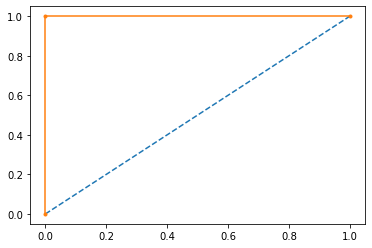

In [424]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.923


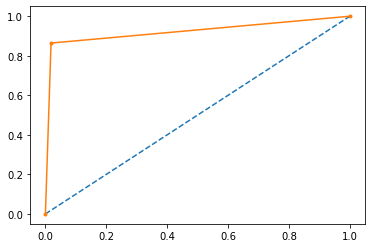

In [425]:
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [426]:
from sklearn.metrics import classification_report,confusion_matrix

In [427]:
confusion_matrix(y_train, ytrain_predict)

array([[6330,    0],
       [   0, 1126]], dtype=int64)

In [428]:
#Train Data Accuracy
dt_model.score(X_train,y_train) 

1.0

In [429]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



In [430]:
confusion_matrix(y_test, ytest_predict)

array([[2652,   50],
       [  67,  427]], dtype=int64)

In [431]:
#Test Data Accuracy
dt_model.score(X_test,y_test)

0.9633917396745932

In [432]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2702
           1       0.90      0.86      0.88       494

    accuracy                           0.96      3196
   macro avg       0.94      0.92      0.93      3196
weighted avg       0.96      0.96      0.96      3196



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

TUNING

In [433]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [434]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [435]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
total_likes_on_outofstation_checkin_received  0.316329
total_likes_on_outstation_checkin_given       0.179211
following_company_page                        0.129639
Yearly_avg_view_on_travel_page                0.098019
yearly_avg_Outstation_checkins                0.063985
week_since_last_outstation_checkin            0.046243
travelling_network_rating                     0.036002
Daily_Avg_mins_spend_on_traveling_page        0.035917
member_in_family                              0.028787
working_flag                                  0.025417
Yearly_avg_comment_on_travel_page             0.018532
Adult_flag                                    0.011651
preferred_location_type                       0.010047
montly_avg_comment_on_company_page            0.000221
preferred_device                              0.000000


In [436]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [437]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [438]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [439]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.91504178, 0.08495822],
       [0.91578947, 0.08421053],
       [0.9218492 , 0.0781508 ],
       ...,
       [0.9218492 , 0.0781508 ],
       [0.5       , 0.5       ],
       [0.91504178, 0.08495822]])

In [440]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.915042,0.084958
1,0.915789,0.084211
2,0.921849,0.078151
3,0.921849,0.078151
4,0.921849,0.078151


AUC: 0.881


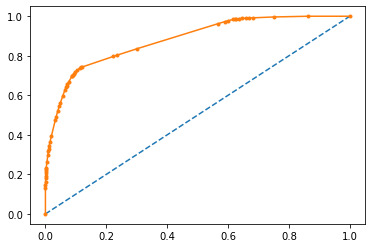

In [441]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.847


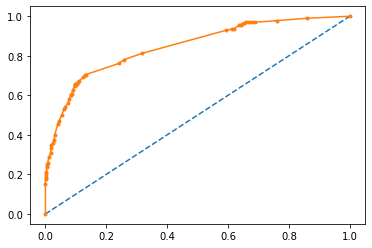

In [442]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [443]:
from sklearn.metrics import classification_report,confusion_matrix

In [444]:
confusion_matrix(y_train, ytrain_predict)

array([[6106,  224],
       [ 572,  554]], dtype=int64)

In [445]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.8932403433476395

In [446]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6330
           1       0.71      0.49      0.58      1126

    accuracy                           0.89      7456
   macro avg       0.81      0.73      0.76      7456
weighted avg       0.88      0.89      0.88      7456



In [447]:
confusion_matrix(y_test, ytest_predict)

array([[2581,  121],
       [ 262,  232]], dtype=int64)

In [448]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.880162703379224

In [449]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2702
           1       0.66      0.47      0.55       494

    accuracy                           0.88      3196
   macro avg       0.78      0.71      0.74      3196
weighted avg       0.87      0.88      0.87      3196



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SMOTE

In [450]:
sm = SMOTE()


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [451]:
## Let's check the shape after SMOTE
X_train_res.shape

(12660, 15)

In [452]:
smote_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
smote_cart_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [453]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [454]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [455]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [456]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.91504178, 0.08495822],
       [0.91578947, 0.08421053],
       [0.9218492 , 0.0781508 ],
       ...,
       [0.9218492 , 0.0781508 ],
       [0.5       , 0.5       ],
       [0.91504178, 0.08495822]])

In [457]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.915042,0.084958
1,0.915789,0.084211
2,0.921849,0.078151
3,0.921849,0.078151
4,0.921849,0.078151


AUC: 0.881


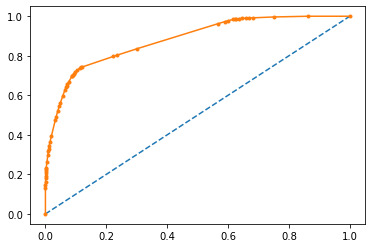

In [458]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.847


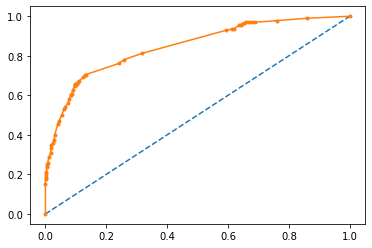

In [459]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [460]:
from sklearn.metrics import classification_report,confusion_matrix

In [461]:
confusion_matrix(y_train, ytrain_predict)

array([[6106,  224],
       [ 572,  554]], dtype=int64)

In [462]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.8932403433476395

In [463]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6330
           1       0.71      0.49      0.58      1126

    accuracy                           0.89      7456
   macro avg       0.81      0.73      0.76      7456
weighted avg       0.88      0.89      0.88      7456



In [464]:
confusion_matrix(y_test, ytest_predict)

array([[2581,  121],
       [ 262,  232]], dtype=int64)

In [465]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.880162703379224

In [466]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2702
           1       0.66      0.47      0.55       494

    accuracy                           0.88      3196
   macro avg       0.78      0.71      0.74      3196
weighted avg       0.87      0.88      0.87      3196



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

LOGISTIC REGRESSION

In [467]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [468]:
log_train_predict = log_model.predict(X_train)
log_test_predict = log_model.predict(X_test)

In [469]:
log_model.score(X_train,y_train)

0.8489806866952789

In [470]:
log_model.score(X_test,y_test)

0.8454317897371715

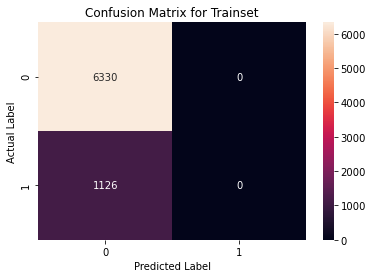

In [471]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [472]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.00      0.00      0.00      1126

    accuracy                           0.85      7456
   macro avg       0.42      0.50      0.46      7456
weighted avg       0.72      0.85      0.78      7456



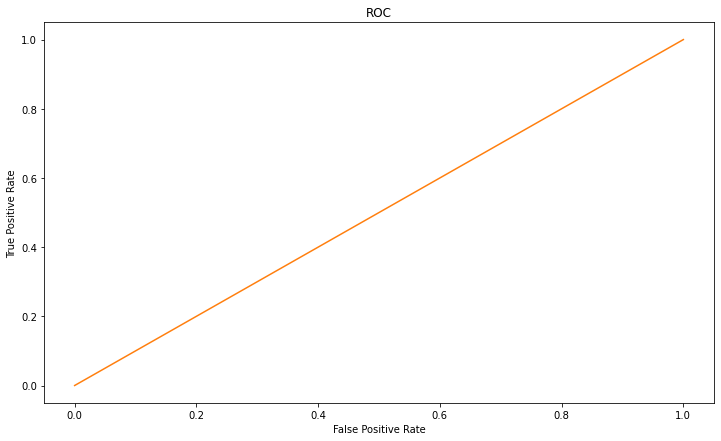

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [475]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,log_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,log_model.predict_proba(X_train)[:,1]))

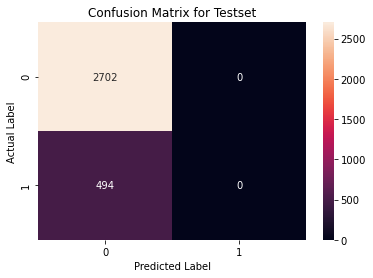

In [495]:
#Confusion Matrix for Train set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [496]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.00      0.00      0.00       494

    accuracy                           0.85      3196
   macro avg       0.42      0.50      0.46      3196
weighted avg       0.71      0.85      0.77      3196



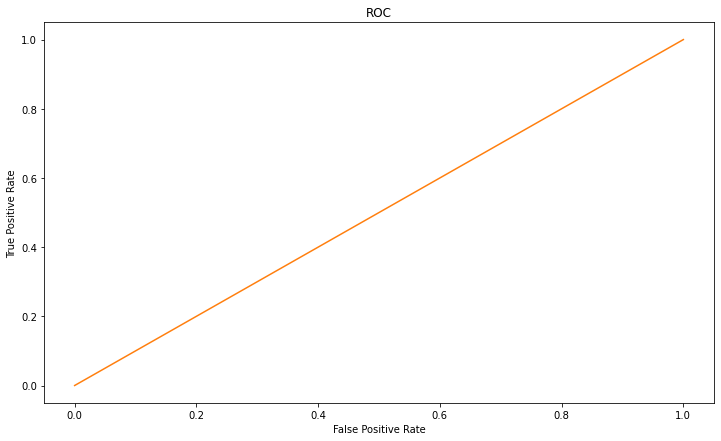

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [497]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

In [498]:
grid_log={'penalty':['none', 'l1', 'l2', 'elasticnet'],
      'solver':['sag','lbfgs','newtoncg','lbfgs', 'liblinear', 'saga'],
      'tol':[0.0001,0.00001]}

In [499]:
grid_search1 = GridSearchCV(estimator = log_model, param_grid = grid_log, cv = 3,n_jobs=-1,scoring='f1')

In [500]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newtoncg', 'lbfgs',
                                    'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [501]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-05)


In [502]:
best_model1 = grid_search1.best_estimator_

In [503]:
# Prediction on the training set

log_train_predict = best_model1.predict(X_train)
log_test_predict = best_model1.predict(X_test)

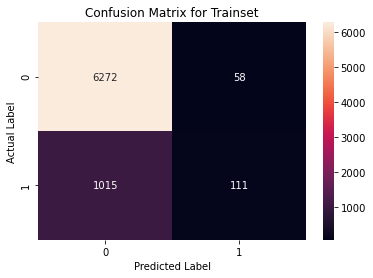

In [504]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [505]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6330
           1       0.66      0.10      0.17      1126

    accuracy                           0.86      7456
   macro avg       0.76      0.54      0.55      7456
weighted avg       0.83      0.86      0.81      7456



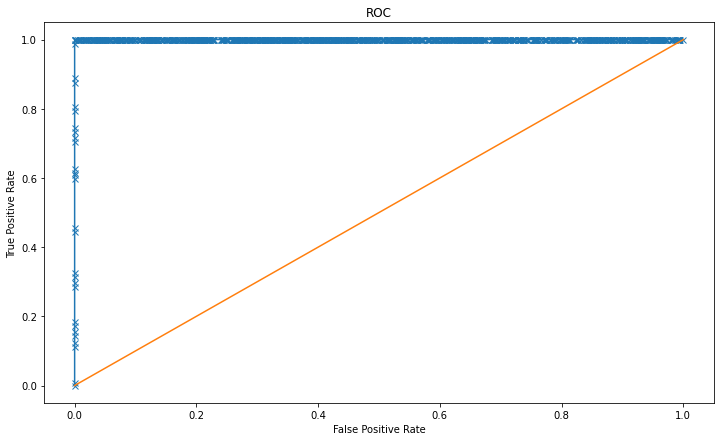

Area under Curve is 1.0


In [506]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,best_model1.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,best_model1.predict_proba(X_train)[:,1]))

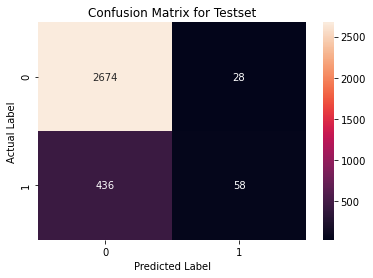

In [507]:
#Confusion Matrix for Test set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [508]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2702
           1       0.67      0.12      0.20       494

    accuracy                           0.85      3196
   macro avg       0.77      0.55      0.56      3196
weighted avg       0.83      0.85      0.81      3196



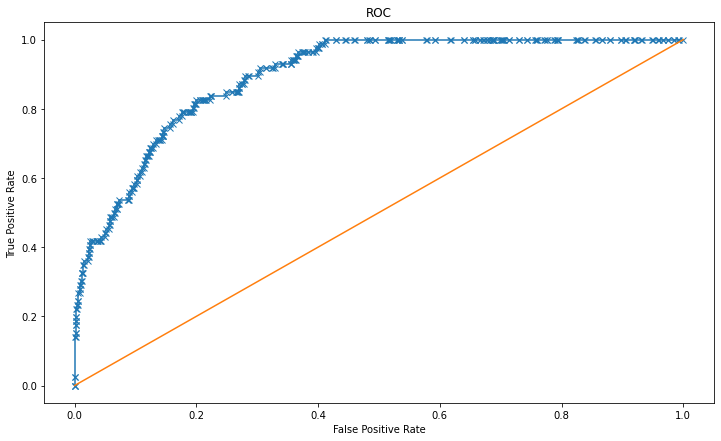

Area under Curve is 0.895393703731399


In [509]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00519
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00001
Feature: 3, Score: 0.02674
Feature: 4, Score: 0.00890
Feature: 5, Score: 0.02632
Feature: 6, Score: -0.00221
Feature: 7, Score: -0.00009
Feature: 8, Score: 0.14586
Feature: 9, Score: 1.42730
Feature: 10, Score: 0.00005
Feature: 11, Score: -0.00643
Feature: 12, Score: -0.16076
Feature: 13, Score: -0.70804
Feature: 14, Score: -0.01521


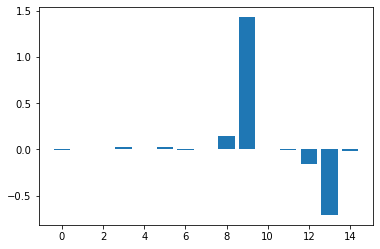

In [510]:
# get importance
importance = best_model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------

Linear Discriminant Analysis

In [511]:
LDA = LinearDiscriminantAnalysis()
lda_model=LDA.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [512]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

In [513]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

In [514]:
lda_model.score(X_train,y_train)

0.8555525751072961

In [515]:
lda_model.score(X_test,y_test)

0.8554443053817271

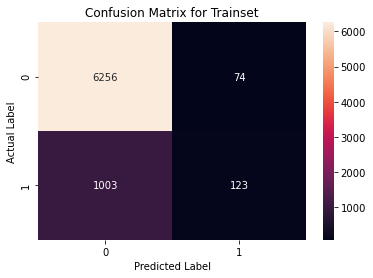

In [516]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [517]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6330
           1       0.62      0.11      0.19      1126

    accuracy                           0.86      7456
   macro avg       0.74      0.55      0.55      7456
weighted avg       0.83      0.86      0.81      7456



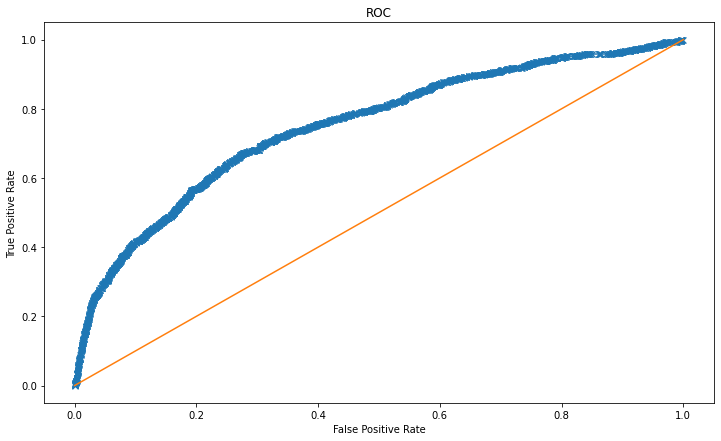

Area under Curve is 0.7491285962416415


In [518]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]))

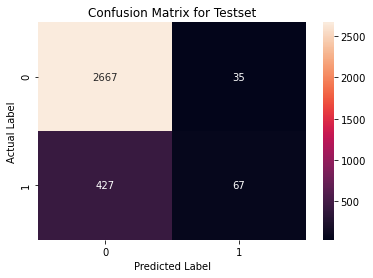

In [519]:
#Confusion Matrix for Train set
confusion_matrix(y_test,lda_test_predict)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [520]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2702
           1       0.66      0.14      0.22       494

    accuracy                           0.86      3196
   macro avg       0.76      0.56      0.57      3196
weighted avg       0.83      0.86      0.81      3196



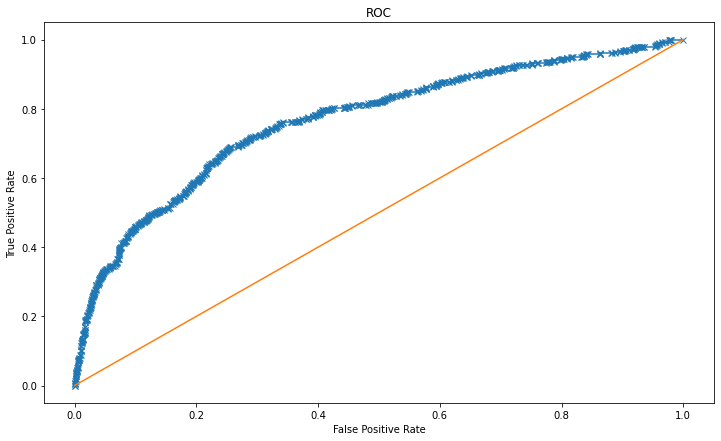

Area under Curve is 0.7654908494832138


In [521]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

In [522]:
grid_lda={ 'solver':['svd', 'lsqr', 'eigen'],
          'shrinkage':['auto', 'float','none'],
          'tol':[0.001,0.0001,0.00001]}

In [523]:
grid_search2 = GridSearchCV(estimator = lda_model, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [524]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [525]:
lda_model.score(X_test,y_test)

0.8554443053817271

In [526]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [527]:
best_model2 = grid_search2.best_estimator_

In [528]:
lda_train_predict = best_model2.predict(X_train)
lda_test_predict = best_model2.predict(X_test)

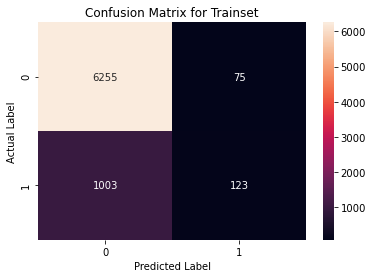

In [529]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()


In [530]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6330
           1       0.62      0.11      0.19      1126

    accuracy                           0.86      7456
   macro avg       0.74      0.55      0.55      7456
weighted avg       0.83      0.86      0.81      7456



In [531]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6330
           1       0.62      0.11      0.19      1126

    accuracy                           0.86      7456
   macro avg       0.74      0.55      0.55      7456
weighted avg       0.83      0.86      0.81      7456



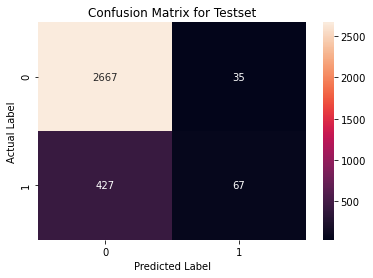

In [532]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()


In [533]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2702
           1       0.66      0.14      0.22       494

    accuracy                           0.86      3196
   macro avg       0.76      0.56      0.57      3196
weighted avg       0.83      0.86      0.81      3196



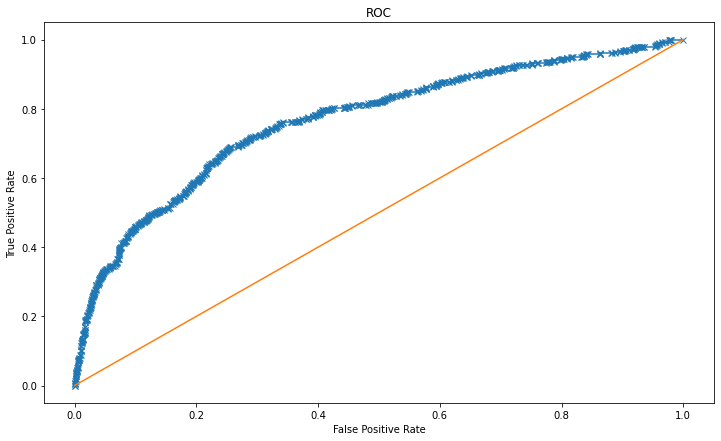

Area under Curve is 0.7654908494832138


In [534]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00543
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00001
Feature: 3, Score: 0.02570
Feature: 4, Score: 0.00605
Feature: 5, Score: 0.02638
Feature: 6, Score: -0.00172
Feature: 7, Score: -0.00006
Feature: 8, Score: 0.14416
Feature: 9, Score: 1.64875
Feature: 10, Score: 0.00026
Feature: 11, Score: -0.00710
Feature: 12, Score: -0.13979
Feature: 13, Score: -0.64690
Feature: 14, Score: -0.01010


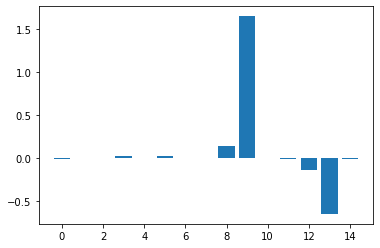

In [535]:
# get importance
importance = best_model2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

RANDOM FOREST

In [536]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)

In [537]:
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [538]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.9718397997496871


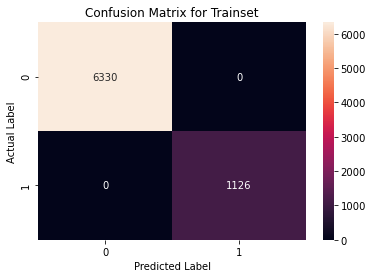

In [539]:
#Confusion Matrix for Train set
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [540]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



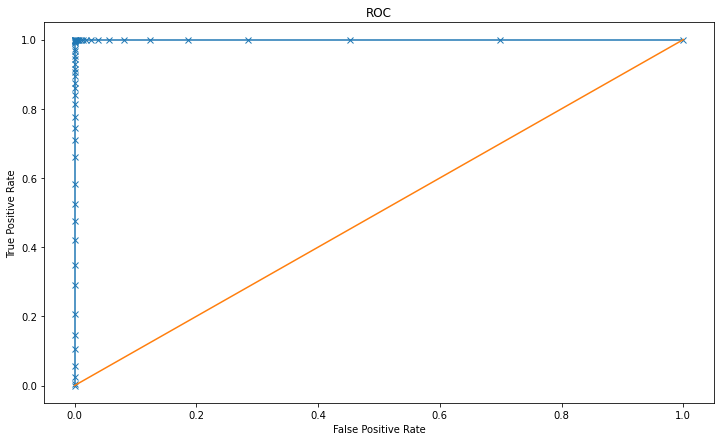

Area under Curve is 1.0


In [541]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1]))

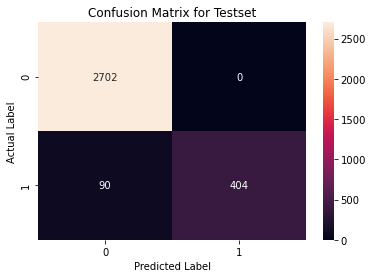

In [542]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [543]:
print(classification_report(y_test,RF_test_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2702
           1       1.00      0.82      0.90       494

    accuracy                           0.97      3196
   macro avg       0.98      0.91      0.94      3196
weighted avg       0.97      0.97      0.97      3196



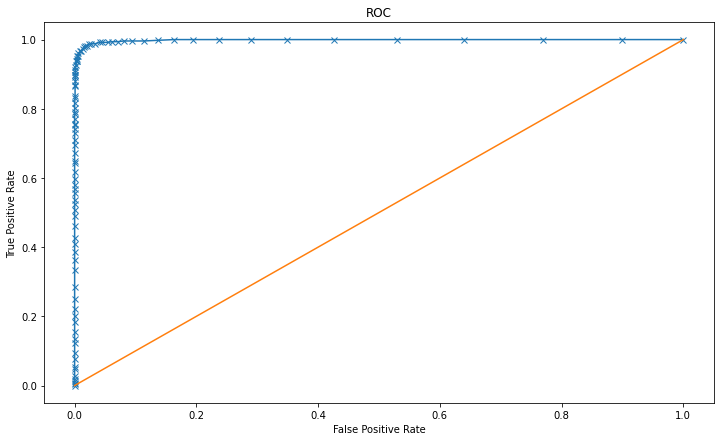

Area under Curve is 0.9983959999640393


In [544]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))

In [545]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [546]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.9718397997496871


RF using grid search

In [547]:
from sklearn.model_selection import RandomizedSearchCV

In [548]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300 ]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

In [549]:
param_grid={
    'max_depth':[7,8,9,10],
    'max_features':[3,4,5],
    'min_samples_leaf':[50,100],
    'min_samples_split':[150,300],
    'n_estimators':[100,200,300]
}
rfcl =RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [550]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [551]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [552]:
best_grid = rf_random.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)

In [553]:
RF_train_predict = best_grid.predict(X_train)
RF_test_predict = best_grid.predict(X_test)

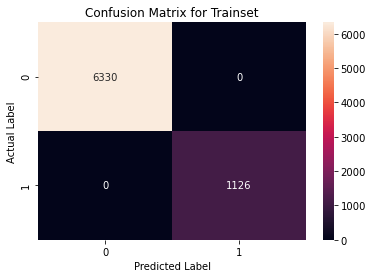

In [554]:
#Confusion Matrix for Test set
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [555]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



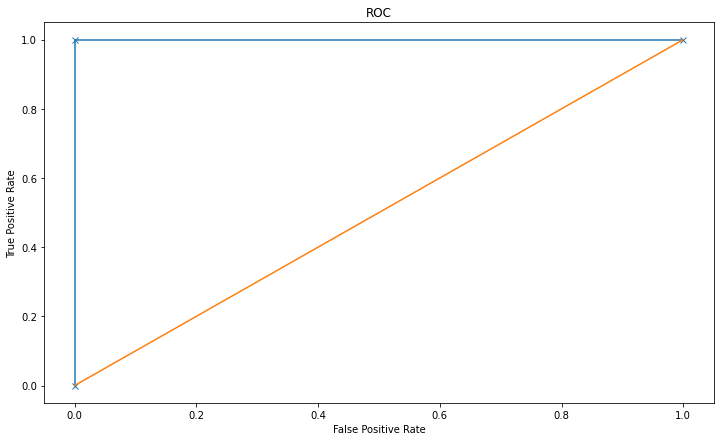

Area under Curve is 1.0


In [556]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

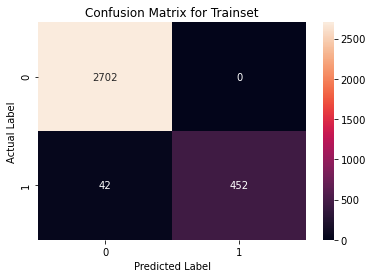

In [557]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [558]:
print(classification_report(y_test,RF_test_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       1.00      0.91      0.96       494

    accuracy                           0.99      3196
   macro avg       0.99      0.96      0.97      3196
weighted avg       0.99      0.99      0.99      3196



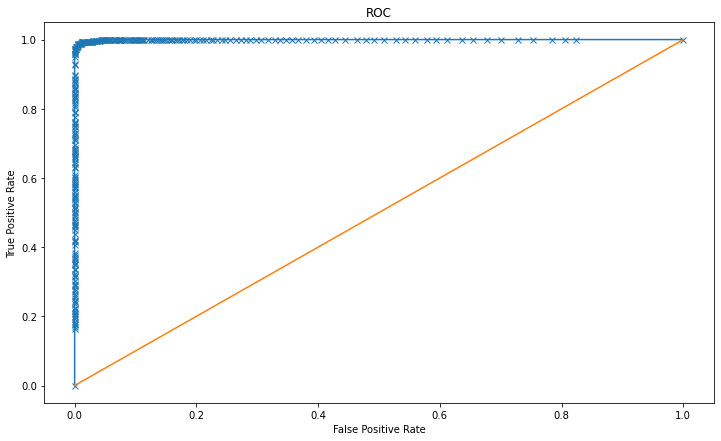

Area under Curve is 0.9996137963481841


In [559]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.12482
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.14435
Feature: 3, Score: 0.07774
Feature: 4, Score: 0.04922
Feature: 5, Score: 0.04535
Feature: 6, Score: 0.07152
Feature: 7, Score: 0.17628
Feature: 8, Score: 0.06151
Feature: 9, Score: 0.06225
Feature: 10, Score: 0.03803
Feature: 11, Score: 0.01427
Feature: 12, Score: 0.04698
Feature: 13, Score: 0.01404
Feature: 14, Score: 0.07364


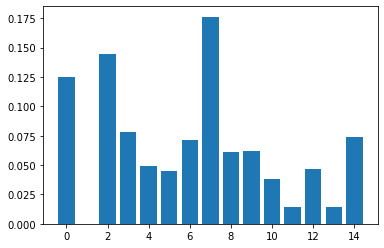

In [560]:
# get importance
importance = best_grid.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNN

In [561]:
from sklearn.neighbors import KNeighborsClassifier

In [562]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    # evaluate test accuracy
    scores = KNN.score(X_test, y_test)
    ac_scores.append(scores)

# accuracy scores for 1,3,5,7....
MCE = [1-x for x in ac_scores]
acc = [x for x in ac_scores]
acc

[0.9918648310387985,
 0.9784105131414268,
 0.9596370463078848,
 0.9311639549436797,
 0.9061326658322904,
 0.8789111389236546,
 0.8629536921151439,
 0.8651439299123905,
 0.8679599499374218,
 0.8601376720901126]

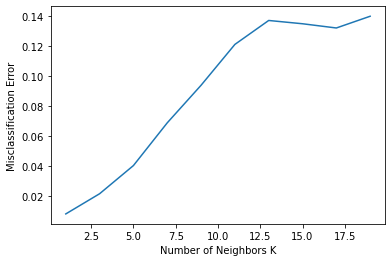

In [563]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

The k-value is 3 

In [564]:
#model score k=3
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
KNN_train_predict = KNN_model.predict(X_train)

KNN_test_predict = KNN_model.predict(X_test)

In [565]:
KNN_model.score(X_train,y_train)

0.994098712446352

In [566]:
KNN_model.score(X_test,y_test)

0.9784105131414268

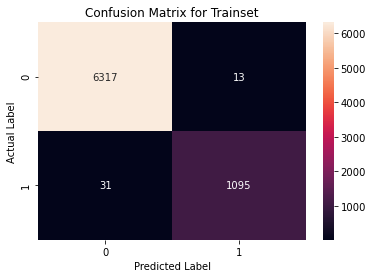

In [567]:
#Confusion Matrix for Train set
confusion_matrix(y_train,KNN_train_predict)
sns.heatmap(confusion_matrix(y_train,KNN_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [568]:
print(classification_report(y_train,KNN_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       0.99      0.97      0.98      1126

    accuracy                           0.99      7456
   macro avg       0.99      0.99      0.99      7456
weighted avg       0.99      0.99      0.99      7456



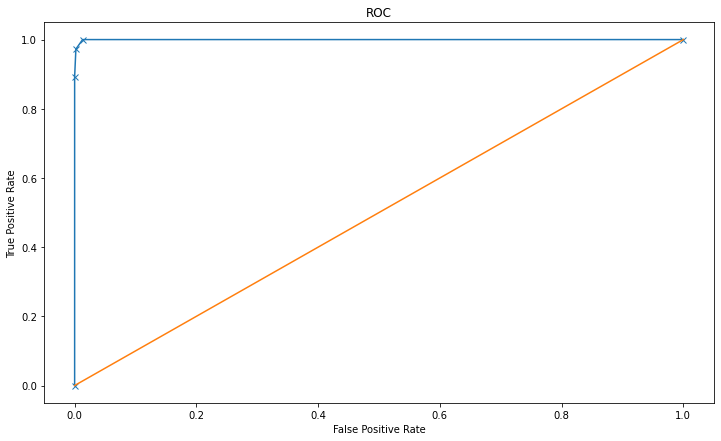

Area under Curve is 0.999709157947017


In [569]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:,1]))

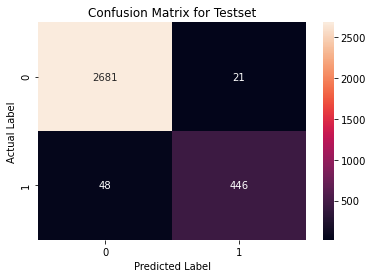

In [570]:
#Confusion Matrix for Train set
confusion_matrix(y_test,KNN_test_predict)
sns.heatmap(confusion_matrix(y_test,KNN_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [571]:
print(classification_report(y_test,KNN_test_predict)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2702
           1       0.96      0.90      0.93       494

    accuracy                           0.98      3196
   macro avg       0.97      0.95      0.96      3196
weighted avg       0.98      0.98      0.98      3196



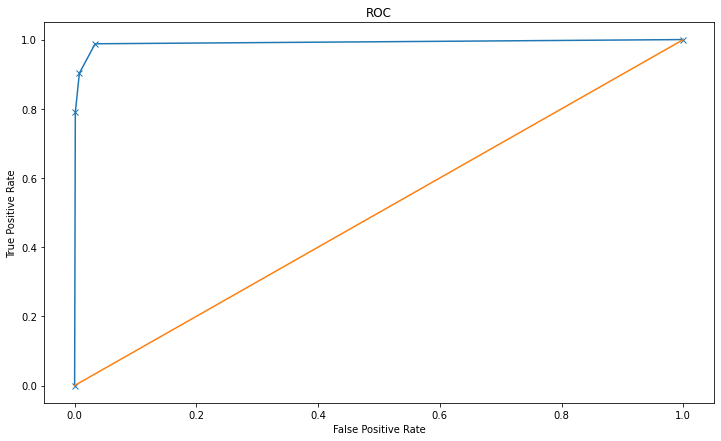

Area under Curve is 0.9910187984908465


In [572]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1]))

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SMOTE

In [476]:
from imblearn.over_sampling import SMOTE 
from sklearn import metrics

In [477]:
sm = SMOTE()


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [478]:
X_train_res.shape

(12660, 15)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

LOGIT

In [479]:
smote_log_model = LogisticRegression()
smote_log_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [480]:
smote_log_train_predict = smote_log_model.predict(X_train_res)
smote_log_test_predict = smote_log_model.predict(X_test)

In [481]:
smote_log_train_predict = smote_log_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_log_train_predict))
print(metrics.classification_report(y_train_res ,smote_log_train_predict))

0.606477093206951
[[3730 2600]
 [2382 3948]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      6330
           1       0.60      0.62      0.61      6330

    accuracy                           0.61     12660
   macro avg       0.61      0.61      0.61     12660
weighted avg       0.61      0.61      0.61     12660



In [482]:
smote_log_test_predict = smote_log_model.predict(X_test)
model_score = smote_log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.6113892365456821
[[1626 1076]
 [ 166  328]]
              precision    recall  f1-score   support

           0       0.91      0.60      0.72      2702
           1       0.23      0.66      0.35       494

    accuracy                           0.61      3196
   macro avg       0.57      0.63      0.53      3196
weighted avg       0.80      0.61      0.67      3196



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

LDA

In [483]:
smote_lda_model = LinearDiscriminantAnalysis()
smote_lda_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [484]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
smote_lda_test_predict = smote_lda_model.predict(X_test)

In [485]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_lda_train_predict))
print(metrics.classification_report(y_train_res ,smote_lda_train_predict))

0.606477093206951
[[4204 2126]
 [1986 4344]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      6330
           1       0.67      0.69      0.68      6330

    accuracy                           0.68     12660
   macro avg       0.68      0.68      0.68     12660
weighted avg       0.68      0.68      0.68     12660



In [486]:
smote_log_test_predict = smote_lda_model.predict(X_test)
model_score = smote_lda_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_lda_test_predict))
print(metrics.classification_report(y_test ,smote_lda_test_predict))

0.6717772215269087
[[1773  929]
 [ 120  374]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      2702
           1       0.29      0.76      0.42       494

    accuracy                           0.67      3196
   macro avg       0.61      0.71      0.59      3196
weighted avg       0.84      0.67      0.72      3196



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNN

In [487]:
Smote_KNN = KNeighborsClassifier(n_neighbors=3)
Smote_KNN.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [488]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
Smote_KNN_test_predict = Smote_KNN.predict(X_test)

In [489]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
model_score = Smote_KNN.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_KNN_train_predict))
print(metrics.classification_report(y_train_res ,Smote_KNN_train_predict))

0.9928120063191154
[[6291   39]
 [  52 6278]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6330
           1       0.99      0.99      0.99      6330

    accuracy                           0.99     12660
   macro avg       0.99      0.99      0.99     12660
weighted avg       0.99      0.99      0.99     12660



In [490]:
smote_log_test_predict = Smote_KNN.predict(X_test)
model_score = Smote_KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.9784105131414268
[[2646   56]
 [  13  481]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2702
           1       0.90      0.97      0.93       494

    accuracy                           0.98      3196
   macro avg       0.95      0.98      0.96      3196
weighted avg       0.98      0.98      0.98      3196



--------------------------------------------------------------------------------------------------------------------------------------------------------------------

RF

In [491]:
Smote_RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Smote_RF_model=Smote_RF_model.fit(X_train_res, y_train_res)

In [492]:
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
Smote_RF_test_predict = Smote_RF_model.predict(X_test)

In [493]:
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
model_score = Smote_RF_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_RF_train_predict))
print(metrics.classification_report(y_train_res ,Smote_RF_train_predict))

1.0
[[6330    0]
 [   0 6330]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      6330

    accuracy                           1.00     12660
   macro avg       1.00      1.00      1.00     12660
weighted avg       1.00      1.00      1.00     12660



In [494]:
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
model_score = Smote_RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, Smote_RF_test_predict))
print(metrics.classification_report(y_test ,Smote_RF_test_predict))

0.9840425531914894
[[2691   11]
 [  40  454]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2702
           1       0.98      0.92      0.95       494

    accuracy                           0.98      3196
   macro avg       0.98      0.96      0.97      3196
weighted avg       0.98      0.98      0.98      3196

